## **Battle of the Neighborhoods**

This notebook will attempt to explain what type of restaurant would be a good choice for high foot traffic(amount of ratings recieved) and reliable high ratings. Also it will visually show regions where placement of a restaurant would be a good fit.

In [1]:
import pandas as pd 
import numpy as np 
#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import requests
from apikey import API
from sklearn import metrics 
from scipy.spatial.distance import cdist 
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

   # A look at the makeup of Newark

![Newark Mathematica Search](NewarkResearch.png)</center>

Using the API to get restaurants for Newark as well as limiting the restaurants to a finite longitude and latitude. Then the data in the category column is one hot encoded to create numerical data for analysis.

In [2]:
API_KEY=API
ENDPOINT="https://api.yelp.com/v3/businesses/search"
HEADER={'Authorization':'bearer %s' %API_KEY}

In [3]:
PARAMETERS= {
    'latitude':40.7357,
    'longitude':-74.1724,
    'radius':1000,
    'limit':50
}
PARAMETERS2= {
    'latitude':40.7357,
    'longitude':-74.1724,
    'radius':1000,
    'limit':50,
    'offset':50
}
PARAMETERS3= {
    'latitude':40.7357,
    'longitude':-74.1724,
    'radius':1000,
    'limit':50,
    'offset':100
}
PARAMETERS4= {
    'latitude':40.7357,
    'longitude':-74.1724,
    'radius':1000,
    'limit':50,
    'offset':150
}

In [4]:
response=requests.get(url=ENDPOINT, params=PARAMETERS, headers=HEADER)
response3=requests.get(url=ENDPOINT, params=PARAMETERS3, headers=HEADER)
response2=requests.get(url=ENDPOINT, params=PARAMETERS2,headers=HEADER)
response4=requests.get(url=ENDPOINT, params=PARAMETERS4,headers=HEADER)

In [5]:
data=response.json()
data2=response2.json()
data3=response3.json()
data4=response4.json()

In [6]:
bd=[]
for biz in data['businesses']:
    bd.append([biz['name'],biz['review_count'],biz['rating'],biz['coordinates']['longitude'],biz['coordinates']['latitude'],biz['categories'][0]['alias']])

for biz in data2['businesses']:
    bd.append([biz['name'],biz['review_count'],biz['rating'],biz['coordinates']['longitude'],biz['coordinates']['latitude'],biz['categories'][0]['alias']])

for biz in data3['businesses']:
    bd.append([biz['name'],biz['review_count'],biz['rating'],biz['coordinates']['longitude'],biz['coordinates']['latitude'],biz['categories'][0]['alias']])
    
for biz in data4['businesses']:
    bd.append([biz['name'],biz['review_count'],biz['rating'],biz['coordinates']['longitude'],biz['coordinates']['latitude'],biz['categories'][0]['alias']])

In [7]:
busdata=pd.DataFrame(bd,columns=['name','reviews','rating','long','lat','cat'])
new=pd.concat([busdata,pd.get_dummies(busdata.cat)],axis=1)
new.drop(['cat'],axis=1,inplace=True)
new.drop([0,2],axis=0,inplace=True)
new.head()

,name,reviews,rating,long,lat,african,aquariums,aquariumservices,arcades,bagels,bakeries,bars,bbq,brazilian,breakfast_brunch,bubbletea,burgers,cafes,caribbean,chinese,coffee,comedyclubs,comfortfood,danceclubs,delis,diners,fishnchips,foodtrucks,german,greek,halal,hookah_bars,hotdogs,icecream,indpak,irish_pubs,italian,japacurry,japanese,juicebars,korean,landmarks,latin,localflavor,lounges,mexican,mideastern,museums,newamerican,noodles,parks,peruvian,pizza,popcorn,portuguese,pubs,rafting,ramen,restaurants,salad,sandwiches,seafood,servicestations,soulfood,spanish,sportsbars,sushi,tex-mex,thai,tobaccoshops,tradamerican,turkish,walkingtours,wine_bars
1,Hobby's Delicatessen & Restaurant,260,4.5,-74.174380,40.735090,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Mercato Tomato Pie,288,4.0,-74.170680,40.734860,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fornos of Spain,737,4.0,-74.163354,40.732472,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,Burger Walla,270,4.0,-74.171340,40.740910,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,The Green Chicpea,188,4.5,-74.171480,40.740570,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
new=new[(new['long']<-74.147506) & (new['lat']>40.724885)&(new['long']>-74.194916)&(new['lat']<40.751158)]

In [9]:
new.shape

(163, 74)

In [10]:
new.describe()

,reviews,rating,long,lat,african,aquariums,aquariumservices,arcades,bagels,bakeries,bars,bbq,brazilian,breakfast_brunch,bubbletea,burgers,cafes,caribbean,chinese,coffee,comedyclubs,comfortfood,danceclubs,delis,diners,fishnchips,foodtrucks,german,greek,halal,hookah_bars,hotdogs,icecream,indpak,irish_pubs,italian,japacurry,japanese,juicebars,korean,landmarks,latin,localflavor,lounges,mexican,mideastern,museums,newamerican,noodles,parks,peruvian,pizza,popcorn,portuguese,pubs,rafting,ramen,restaurants,salad,sandwiches,seafood,servicestations,soulfood,spanish,sportsbars,sushi,tex-mex,thai,tobaccoshops,tradamerican,turkish,walkingtours,wine_bars
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.0,163.0,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.00000,163.0,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.0,163.000000,163.000000,163.000000,163.0,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.00000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.0,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.0,163.0
mean,69.766871,3.622699,-74.169921,40.735557,0.018405,0.0,0.0,0.006135,0.006135,0.018405,0.006135,0.030675,0.012270,0.012270,0.006135,0.012270,0.042945,0.006135,0.042945,0.06135,0.0,0.006135,0.006135,0.036810,0.006135,0.006135,0.018405,0.006135,0.0,0.018405,0.006135,0.012270,0.0,0.018405,0.006135,0.018405,0.006135,0.006135,0.006135,0.012270,0.006135,0.006135,0.006135,0.024540,0.024540,0.018405,0.012270,0.04908,0.006135,0.006135,0.006135,0.079755,0.006135,0.018405,0.006135,0.0,0.006135,0.036810,0.012270,0.030675,0.006135,0.006135,0.006135,0.055215,0.018405,0.012270,0.012270,0.006135,0.006135,0.024540,0.006135,0.0,0.0
std,104.149262,0.755825,0.004390,0.004288,0.134825,0.0,0.0,0.078326,0.078326,0.134825,0.078326,0.172967,0.110427,0.110427,0.078326,0.110427,0.203357,0.078326,0.203357,0.24071,0.0,0.078326,0.078326,0.188875,0.078326,0.078326,0.134825,0.078326,0.0,0.134825,0.078326,0.110427,0.0,0.134825,0.078326,0.134825,0.078326,0.078326,0.078326,0.110427,0.078326,0.078326,0.078326,0.155195,0.155195,0.134825,0.110427,0.21670,0.078326,0.078326,0.078326,0.271748,0.078326,0.134825,0.078326,0.0,0.078326,0.188875,0.110427,0.172967,0.078326,0.078326,0.078326,0.229103,0.134825,0.110427,0.110427,0.078326,0.078326,0.155195,0.078326,0.0,0.0
min,1.000000,1.500000,-74.179360,40.726841,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,10.000000,3.000000,-74.173034,40.732037,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,26.000000,3.500000,-74.170764,40.735347,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000

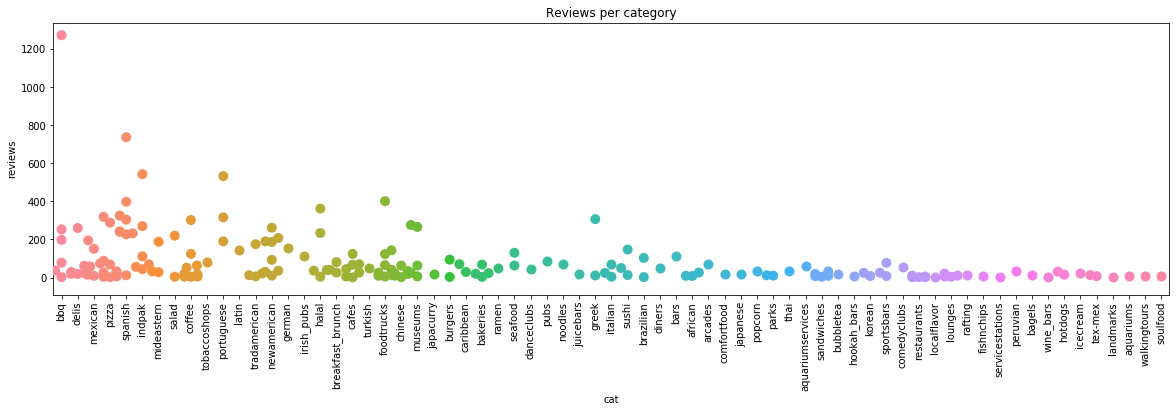

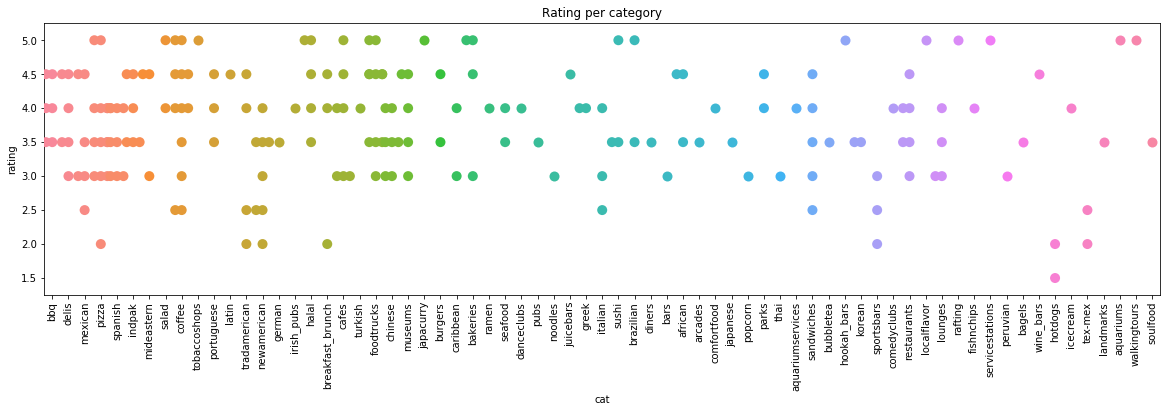

In [11]:
plt.figure(figsize=(20,5))
sns.swarmplot(data=busdata,x='cat',y='reviews',s=10)
plt.xticks(rotation=90)
plt.title("Reviews per category")
plt.show()
plt.figure(figsize=(20,5))
sns.swarmplot(data=busdata,x='cat',y='rating',s=10)
plt.xticks(rotation=90)
plt.title("Rating per category")
plt.show()

Using the category column to do a preliminary analysis of Ratings and Reviews columns

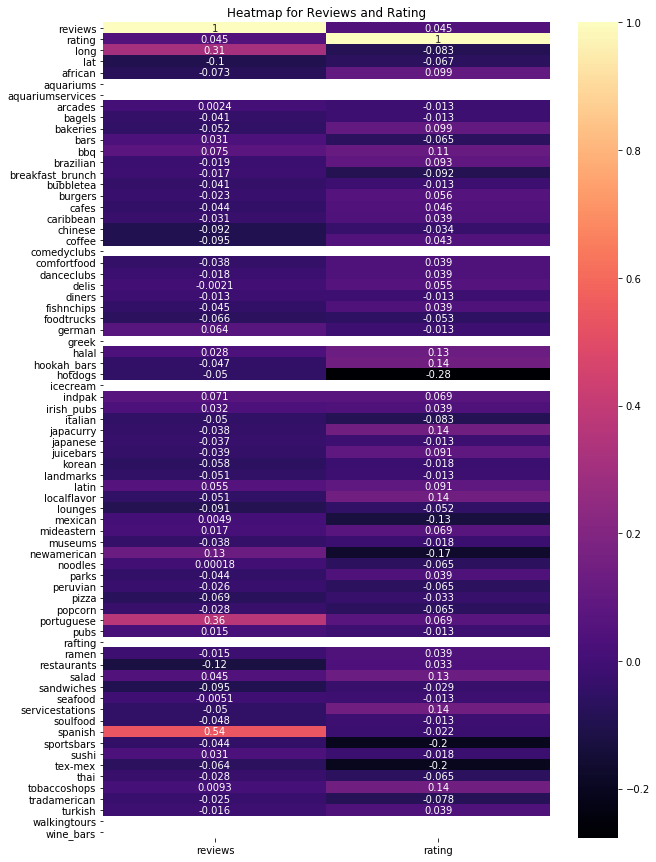

In [12]:
plt.figure(figsize=(10,15))
sns.heatmap(new.corr().iloc[:,0:2],cmap='magma',annot=True)
plt.title("Heatmap for Reviews and Rating")
plt.show()

This heatmap shows that there are positive correlations for spanish and portugese food as well as longitude for the reviews column. It also shows little to no correlations for rating and any of the given categories.

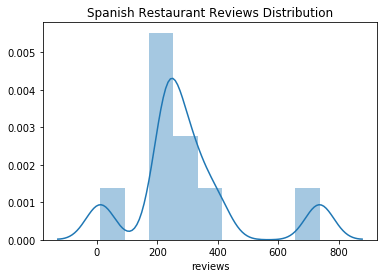

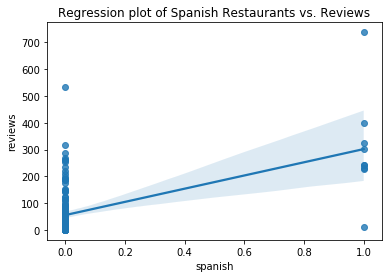

In [21]:
#Spanish Correlation
sns.distplot(new[new['spanish']==1].reviews)
plt.title('Spanish Restaurant Reviews Distribution')
plt.show()
sns.regplot(x='spanish',y='reviews',data=new)
plt.title('Regression plot of Spanish Restaurants vs. Reviews')
plt.show()

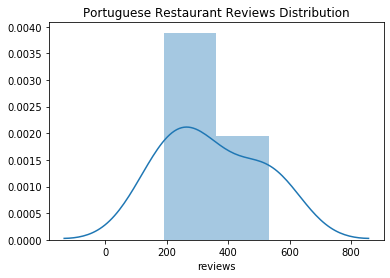

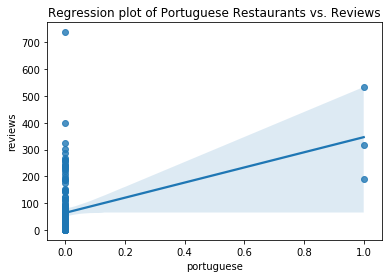

In [25]:
#Spanish Correlation
sns.distplot(new[new['portuguese']==1].reviews)
plt.title('Portuguese Restaurant Reviews Distribution')
plt.show()
sns.regplot(x='portuguese',y='reviews',data=new)
plt.title('Regression plot of Portuguese Restaurants vs. Reviews')
plt.show()

Text(0.5, 1, 'Reviews vs. Ratings Regression')

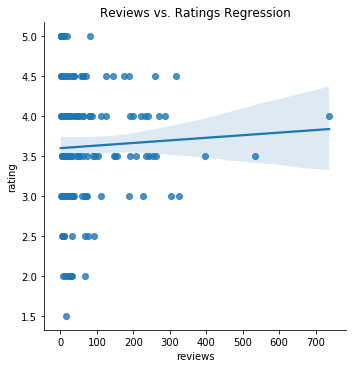

In [26]:
sns.lmplot(x='reviews',y='rating',data=new)
plt.title('Reviews vs. Ratings Regression')

This graph shows that the number of reviews has little to no impact on the rating of a restaurant.

Text(0.5, 0, 'Categories')

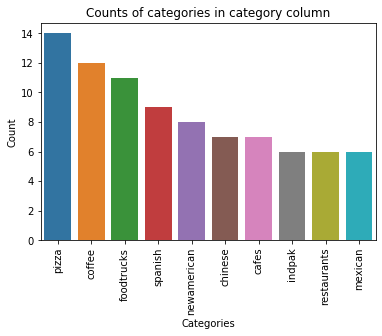

In [27]:
sns.countplot(busdata.cat,order=busdata.cat.value_counts()[0:10].index)
plt.xticks(rotation=90)
plt.title("Counts of categories in category column")
plt.ylabel("Count")
plt.xlabel("Categories")

These are the counts of the categories listed in the data. It appears that there are many pizza, coffee, and foodtruck stations.

In [28]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K:  
    kmeanModel = KMeans(n_clusters=k).fit(new.iloc[:,1:2]) 
    kmeanModel.fit(new.iloc[:,1:2])     
      
    distortions.append(sum(np.min(cdist(new.iloc[:,1:2], kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / new.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(new.iloc[:,1:2], kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / new.iloc[:,1:2].shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

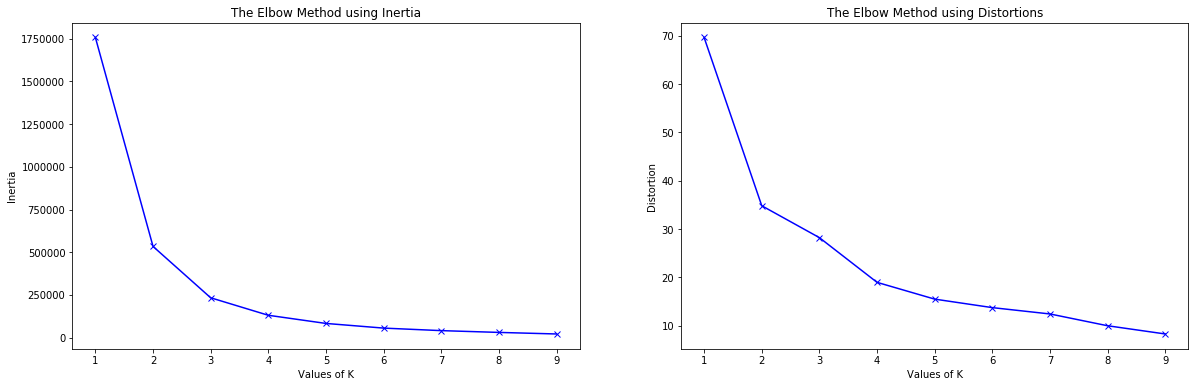

In [29]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,6))
ax1.plot(K, inertias, 'bx-') 
ax1.set_xlabel('Values of K') 
ax1.set_ylabel('Inertia') 
ax1.set_title('The Elbow Method using Inertia') 
 
ax2.plot(K, distortions, 'bx-') 
ax2.set_xlabel('Values of K') 
ax2.set_ylabel('Distortion') 
ax2.set_title('The Elbow Method using Distortions') 
plt.show() 

This graph suggest we try 2 or 3 clusters for our Kmeans Clustering algorithm.

In [30]:
data=new.iloc[:,1:5]
kmeanModel3 = KMeans(n_clusters=2).fit(data) 
kmeanModel3.fit(data) 
new['cluster']=kmeanModel3.predict(data)

In [31]:
longitude=-74.172363
latitude=40.735657
kclusters=2
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=14.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.Set1(np.linspace(0, 0.6, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(new['lat'], new['long'],new['name'],new['cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        fillColor=rainbow[cluster-1],
        color='black',
        weight=2,
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Ferry St, Bleeker St, and the Elm St area seem to get a lot of reviews. These are high foot traffic areas.(Most reviews)

In [32]:
pd.DataFrame(new.groupby('cluster')['reviews'].count())

,reviews
cluster,
0,139
1,24


There are 24 restaurants in cluster 1 lets get some information about the clusters by pulling up some aggregate statistics.

In [33]:
new.groupby('cluster').mean()

,reviews,rating,long,lat,african,aquariums,aquariumservices,arcades,bagels,bakeries,bars,bbq,brazilian,breakfast_brunch,bubbletea,burgers,cafes,caribbean,chinese,coffee,comedyclubs,comfortfood,danceclubs,delis,diners,fishnchips,foodtrucks,german,greek,halal,hookah_bars,hotdogs,icecream,indpak,irish_pubs,italian,japacurry,japanese,juicebars,korean,landmarks,latin,localflavor,lounges,mexican,mideastern,museums,newamerican,noodles,parks,peruvian,pizza,popcorn,portuguese,pubs,rafting,ramen,restaurants,salad,sandwiches,seafood,servicestations,soulfood,spanish,sportsbars,sushi,tex-mex,thai,tobaccoshops,tradamerican,turkish,walkingtours,wine_bars
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,33.769784,3.600719,-74.170408,40.735777,0.021583,0.0,0.0,0.007194,0.007194,0.021583,0.007194,0.021583,0.014388,0.014388,0.007194,0.014388,0.05036,0.007194,0.05036,0.071942,0.0,0.007194,0.007194,0.035971,0.007194,0.007194,0.021583,0.007194,0.0,0.014388,0.007194,0.014388,0.0,0.014388,0.007194,0.021583,0.007194,0.007194,0.007194,0.014388,0.007194,0.007194,0.007194,0.028777,0.028777,0.014388,0.014388,0.028777,0.007194,0.007194,0.007194,0.086331,0.007194,0.000,0.007194,0.0,0.007194,0.043165,0.007194,0.035971,0.007194,0.007194,0.007194,0.007194,0.021583,0.014388,0.014388,0.007194,0.007194,0.021583,0.007194,0.0,0.0
1,278.250000,3.750000,-74.167101,40.734277,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.0,0.041667,0.000000,0.000000,0.0,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.041667,0.000000,0.166667,0.000000,0.000000,0.000000,0.041667,0.000000,0.125,0.000000,0.0,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.041667,0.000000,0.0,0.0


On average cluster one gets a +0.143 rating and it receives 244 more ratings. We can see cluster 1 is made up of a high majority of portugese restaurants, as well as spanish, and tradamerican

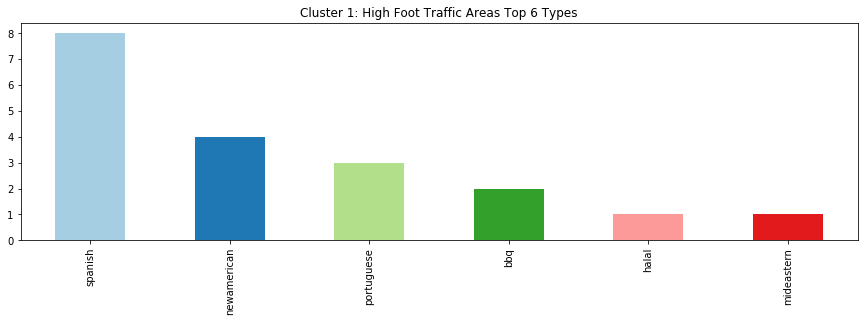

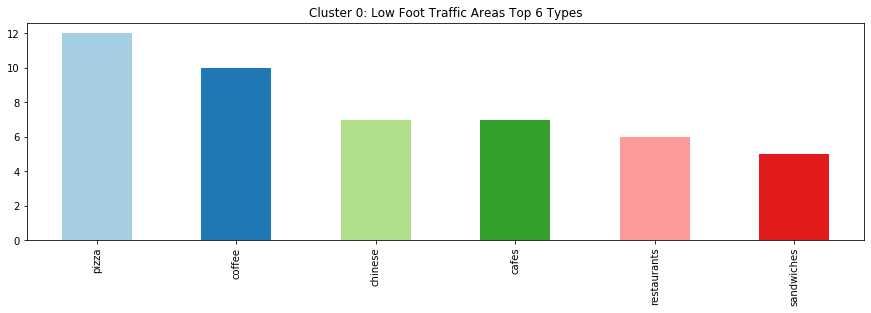

In [34]:
plt.figure(figsize=(15,4))
new.groupby('cluster').sum().iloc[1,4:].sort_values(ascending=False)[:6].plot(kind='bar',title='Cluster 1: High Foot Traffic Areas Top 6 Types',color=plt.cm.Paired(np.arange(len(new))))
plt.show()
plt.figure(figsize=(15,4))
new.groupby('cluster').sum().iloc[0,4:].sort_values(ascending=False)[:6].plot(kind='bar',title='Cluster 0: Low Foot Traffic Areas Top 6 Types',color=plt.cm.Paired(np.arange(len(new))))
plt.show()

Cultural food is very popular in Newark NJ. Spanish/NewAmerican/Portugese/bbq/halal/mideastern. Should try to stay away from opening a pizza, coffee, or Chinese restaurant.

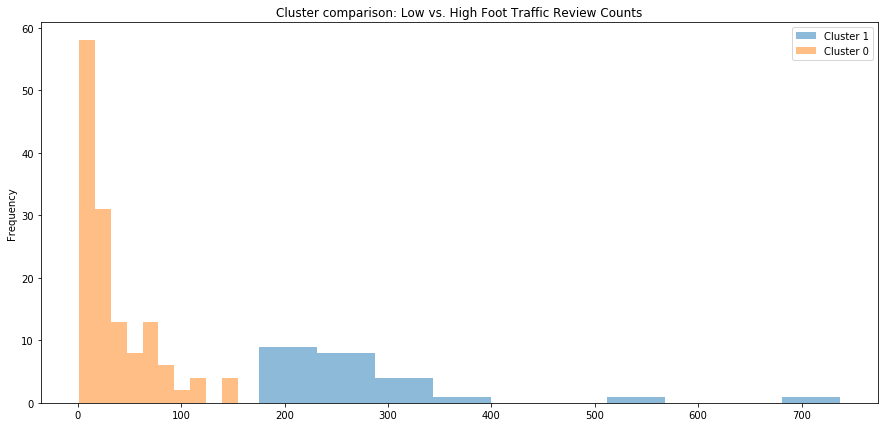

In [35]:
plt.figure(figsize=(15,7))
new[new['cluster']==1].reviews.plot(kind='hist',label='Cluster 1',alpha=0.5)
new[new['cluster']==0].reviews.plot(kind='hist',title='Cluster comparison: Low vs. High Foot Traffic Review Counts',label='Cluster 0',alpha=0.5)
plt.legend()

Cluster 0 and Cluster 1 are right skewed distributions where the majority of the data points for cluster's 1 and 0 are located at about 200, and 0 respectively

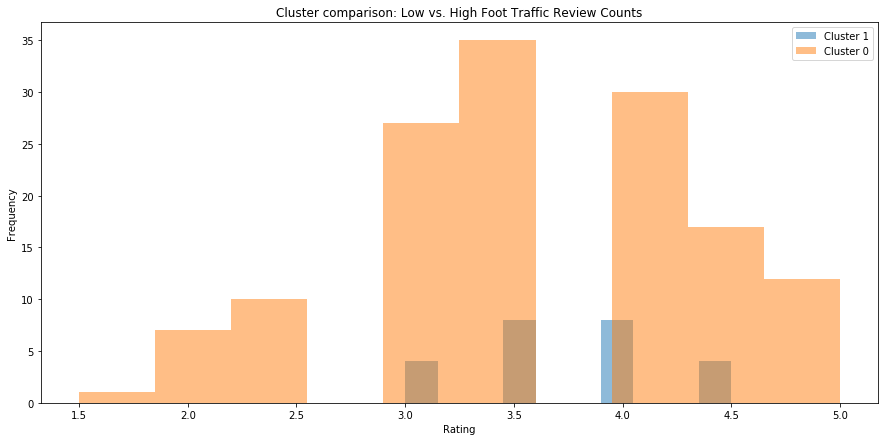

In [36]:
plt.figure(figsize=(15,7))
new[new['cluster']==1].rating.plot(kind='hist',label='Cluster 1', alpha=0.5, bins=10)
new[new['cluster']==0].rating.plot(kind='hist',title='Cluster comparison: Low vs. High Foot Traffic Review Counts',label='Cluster 0',alpha=0.5,bins=10)
plt.xlabel("Rating")
plt.legend()

In [37]:
new[(new.rating==min(new.rating))&(new['cluster']==0)].iloc[:,0:3]

,name,reviews,rating
184,McDonald's,15,1.5


McDonald's is the lowest rated restaurant in Newark :( it is located in cluster 0

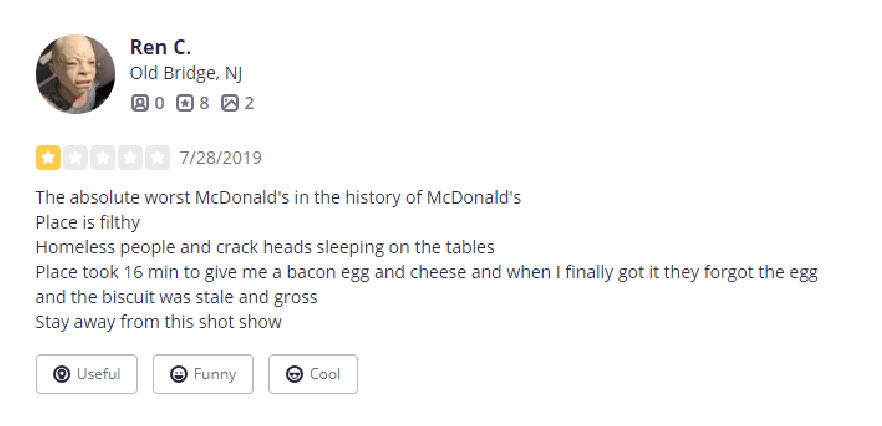

In [38]:
plt.figure(figsize=(15.56,10.32))
img=plt.imread('bad.png')
plt.axis('off')
plt.imshow(img)
plt.show()

These are the ratings at a glance

In [39]:
new[(new.rating>4)& new['cluster']==1].sort_values('reviews',ascending=False).iloc[:,0:3]

,name,reviews,rating
10,Sabor Unido,316,4.5
1,Hobby's Delicatessen & Restaurant,260,4.5
6,The Green Chicpea,188,4.5
12,Bello's Pub & Grill,175,4.5


Some of the ratings in cluster 1 above are for restaurants with above a 4 rating.

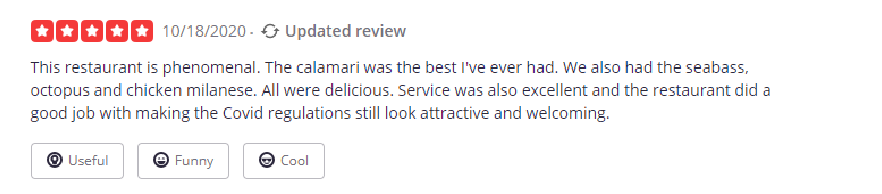

In [40]:
plt.figure(figsize=(15.56,10.32))
img=plt.imread('good.png')
plt.axis('off')
plt.imshow(img)
plt.show()

A sample from a high rated restaurant.

#### **Suggestion:** Open up a Spanish, New American, or Portugese, or bbq(Highest types) restaurant on Bleeker St, Market St, or Elm St. (High Foot traffic areas)